In [1]:
#Various imports
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, BasicAer, Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity, Statevector
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
def qft(circ, q, d):
# circ is QuantumCircuit Object, q is QuantumRegister object, d is the number.
    for j in range(d):
        circ.h(q[j])
        for k in range(j+1,d):
            circ.cu1(pi/float(2**(k-j)), q[k], q[j])
        #circ.barrier()
def qftinv(circ, q, d):
# circ is QuantumCircuit Object, q is QuantumRegister object, d is the number.
    for j in range(d):
        circ.h(q[j])
        for k in range(j+1,d):
            circ.cu1(pi/float(2**(j-k)), q[k], q[j])
        #circ.barrier()

In [3]:
def Generate_Jordan_Circuit(n, n0, d):
#Notation as in Jordan's paper. 
#n is the size of the input registers
#n0 is the size of the output register
#d is the dimension of our variable space
    #First we define a list to hold our d Quantum registers with n qubits
    input_registers = [QuantumRegister(n, "input_"+str(i)) for i in range(d)]
    #Now to define the ouput and classical registers
    output_register = QuantumRegister(n0, "output")
    classical_registers = [ClassicalRegister(n, "c_"+str(i)) for i in range(d)]
    #Instantiate the circuit using the defined registers
    circuit = QuantumCircuit(*input_registers, output_register, *classical_registers)
    #Add Hadamard gates to every qubit on the input registers
    for i in range(d):
        for j in range(n):
            circuit.h(input_registers[i][j])
    #Flip the last qubit of the output register to obtain a |1>
    circuit.x(output_register[n0-1])
    #Apply the QFT to the output register
    qft(circuit, output_register, n0)
    #This barrier is where we'll add the modular addition oracle A
    circuit.barrier()
    #Finally, apply the QFT to each of the input registers
    for i in range(d):
        qft(circuit, input_registers[i], n)
    circuit.barrier()
    #And measure each input register
    for i in range(d):
        circuit.measure(input_registers[i], classical_registers[i])
    return circuit

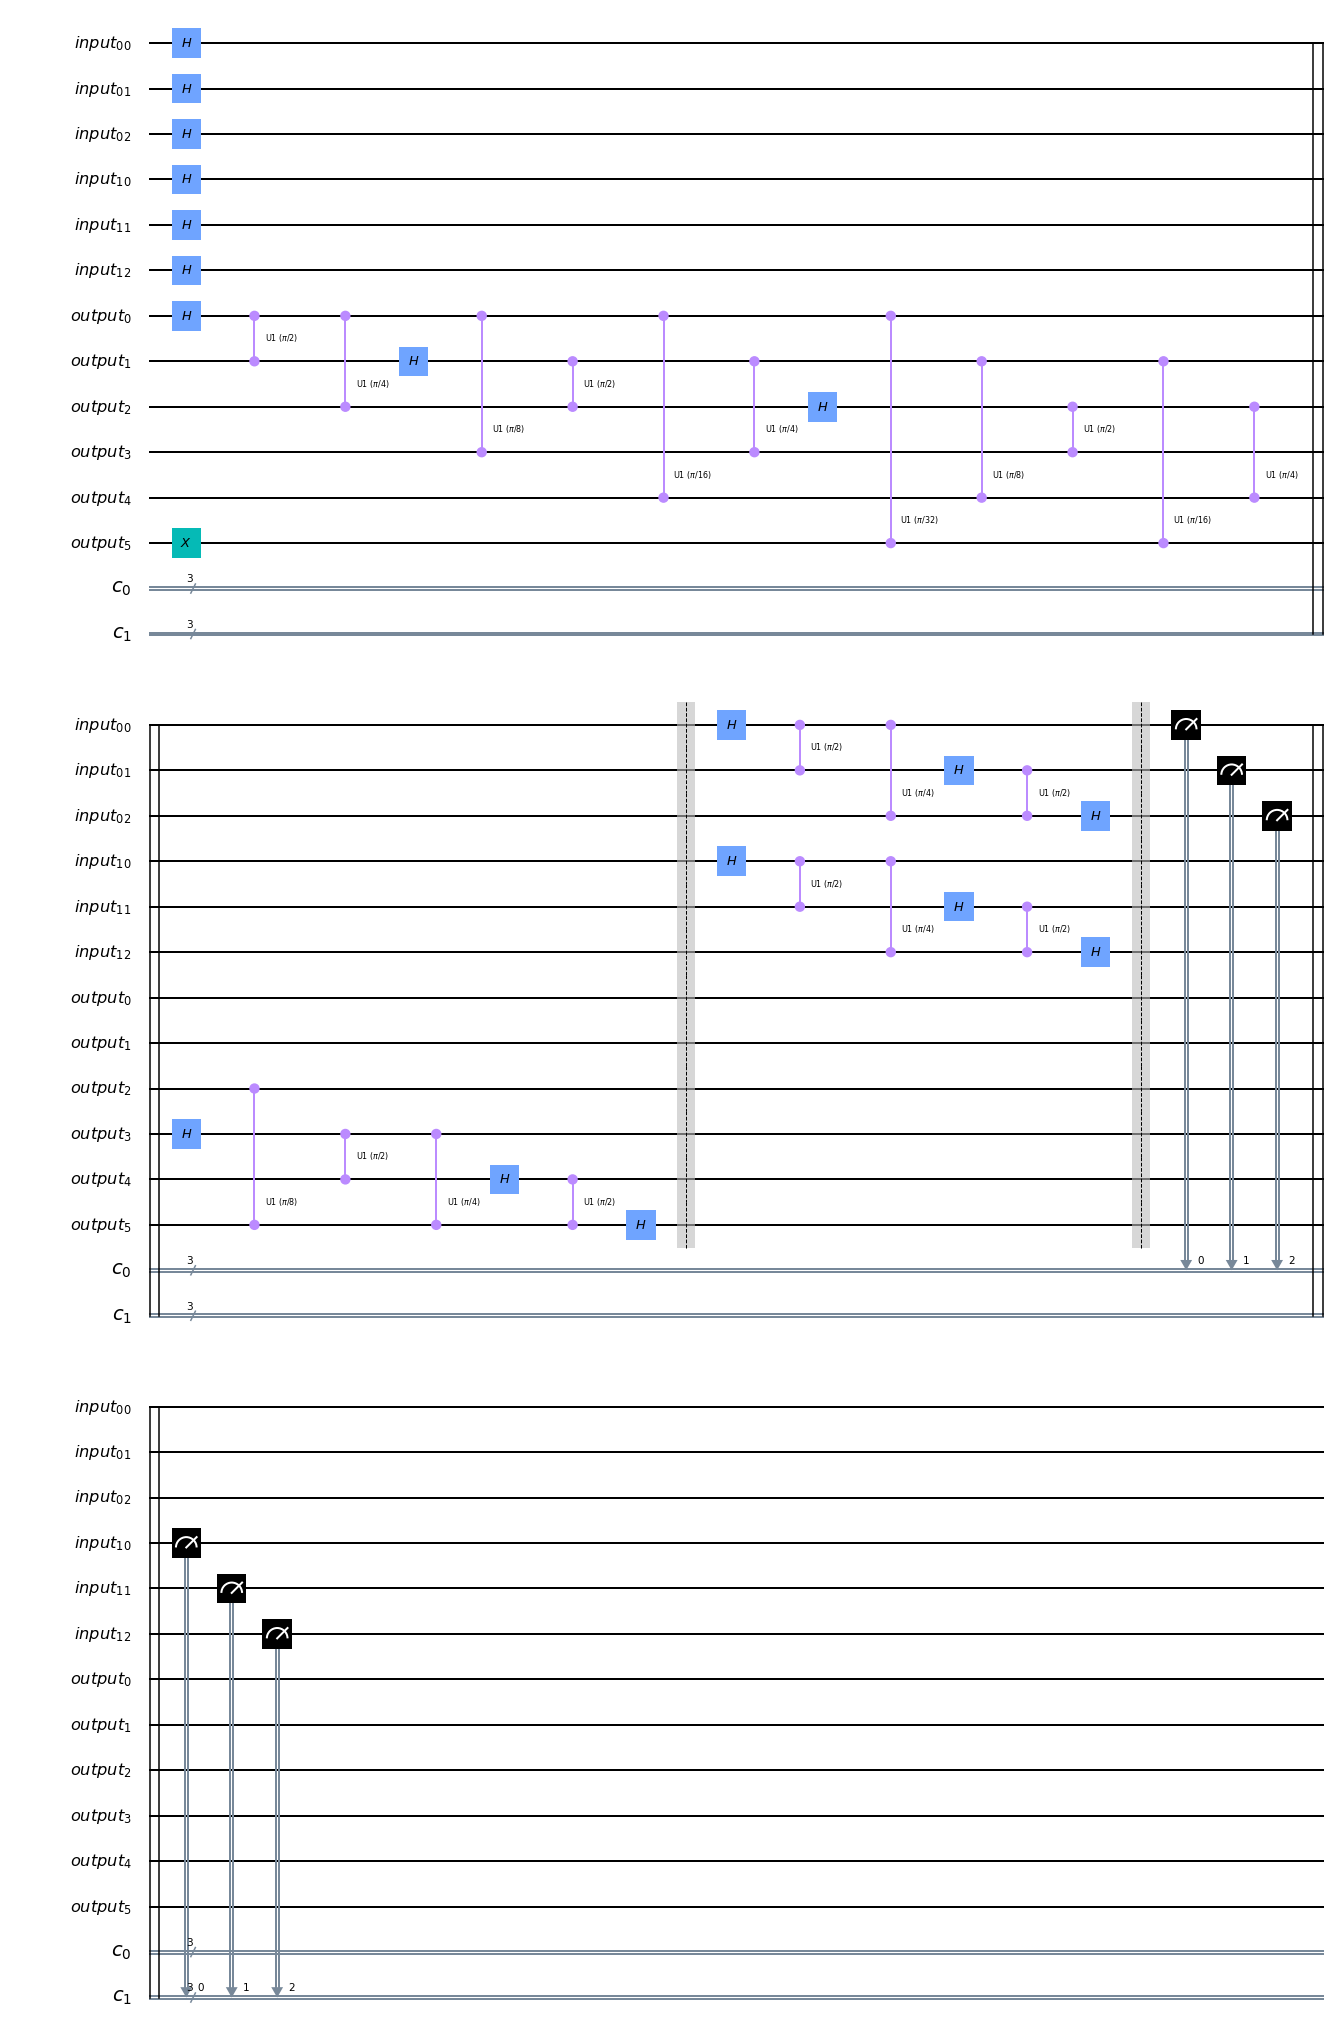

In [4]:
# define the number of qubits, dimension of the problem
n = 3
n0 = n + 3
d = 2
qc = Generate_Jordan_Circuit(n, n0, d)
# call the draw method to plot the circuit
qc.draw("mpl")

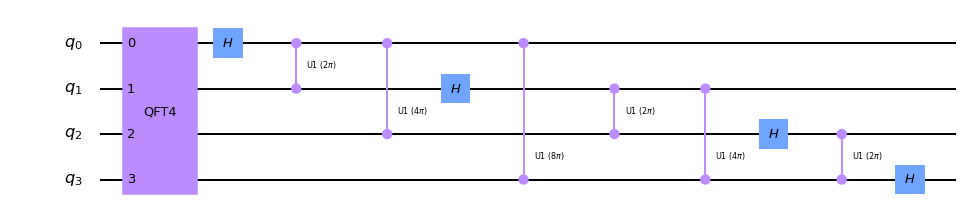

In [10]:
#Testing the QFT and its inverse. For some reason, doesn't like n = 3
def QFT(circ, n):
# circ is QuantumCircuit Object, n is the size of the register
    for j in range(n):
        circ.h(j)
        for k in range(j+1,n):
            circ.cu1(pi/float(2**(k-j)), k, j)

def QFTinv(circ, n):
# circ is QuantumCircuit Object, n is the size of the register
    for j in range(n):
        circ.h(j)
        for k in range(j+1,n):
            circ.cu1(pi/float(2**(j-k)), k, j)
        #circ.barrier()
        
"""
SAS New Code:
"""

def QFT_new(n):
    qft_circ = QuantumCircuit(n)
    for i in range(n-1, -1, -1):
        qft_circ.h(i)
        for j in range(i - 1, -1, -1):
            qft_circ.cu1(pi/(2 ** (i - j)), j, i)
    for i in range(n // 2):
        qft_circ.swap(i, n - i - 1)
    gate = qft_circ.to_gate()
    gate.name = "QFT" + str(n)
    return  gate
    
n = 4
sv = Statevector.from_label("0"*(n-1) + "1")
qc = QuantumCircuit(n)
qc.append(QFT_new(n), range(n))
QFTinv(qc, n)
qc.draw("mpl")

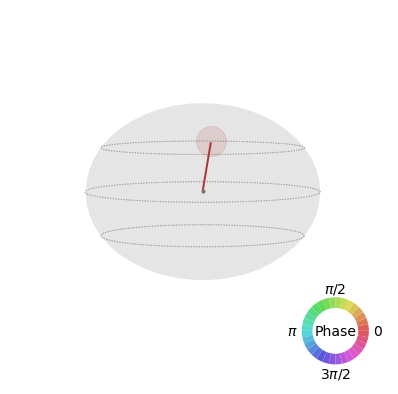

In [5]:
sv = sv.evolve(qc)
plot_state_qsphere(sv.data)